<a href="https://colab.research.google.com/github/Yungjieee/Global-Ocean-Plastic-Pollution-Dashboard/blob/main/Global_Ocean_Plastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and setup

In [ ]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Ensure non-interactive backend
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # In case only plt is used

import seaborn as sns

# For inline plotting on Kaggle
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set(style='whitegrid', context='notebook')

# Data Loading and Exploration

In [ ]:
# Load the dataset
data_file = 'ocean_plastic_pollution_data_2015.csv'
df = pd.read_csv(data_file, encoding='ascii', delimiter=',')

# Display the first few rows
print('Head of the dataframe:')
print(df.head())

# Display dataframe info and summary statistics
print('\nDataframe info:')
print(df.info())

print('\nSummary Statistics:')
print(df.describe(include='all'))

Head of the dataframe:
            Date          Region   Latitude   Longitude  \
0  01-01-15 0:00    Arctic Ocean -58.459627 -169.626456   
1  01-01-15 1:00  Southern Ocean  49.449892   77.319852   
2  01-01-15 2:00    Indian Ocean  80.422411  130.332581   
3  01-01-15 3:00  Southern Ocean -71.920725   58.003563   
4  01-01-15 4:00  Southern Ocean -61.993742 -169.011282   

                       Plastic_Type  Plastic_Weight_kg  Depth_meters  
0  Polyethylene Terephthalate (PET)              41.93         73.09  
1                 Polyethylene (PE)             403.38         71.21  
2  Polyethylene Terephthalate (PET)             241.70         19.53  
3  Polyethylene Terephthalate (PET)             482.76         69.72  
4  Polyethylene Terephthalate (PET)              58.75         58.14  

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------            

# Data Cleaning and Preprocessing


In [ ]:
# Convert 'Date' column to datetime. The date might be in various formats, so errors='coerce' ensures invalid formats are set as NaT.
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# It might be useful to extract additional temporal features if the date conversion is successful
if df['Date'].notnull().sum() > 0:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    print('Date conversion and feature extraction successful.')
else:
    print('Date conversion failed for all rows. Please check the format of the Date column.')

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

# For simplicity, drop rows with missing values.
df.dropna(inplace=True)
print('\nDataframe shape after dropping missing values:', df.shape)

Date conversion and feature extraction successful.

Missing values in each column:
Date                 0
Region               0
Latitude             0
Longitude            0
Plastic_Type         0
Plastic_Weight_kg    0
Depth_meters         0
Year                 0
Month                0
Day                  0
dtype: int64

Dataframe shape after dropping missing values: (15000, 10)


# Visualizations


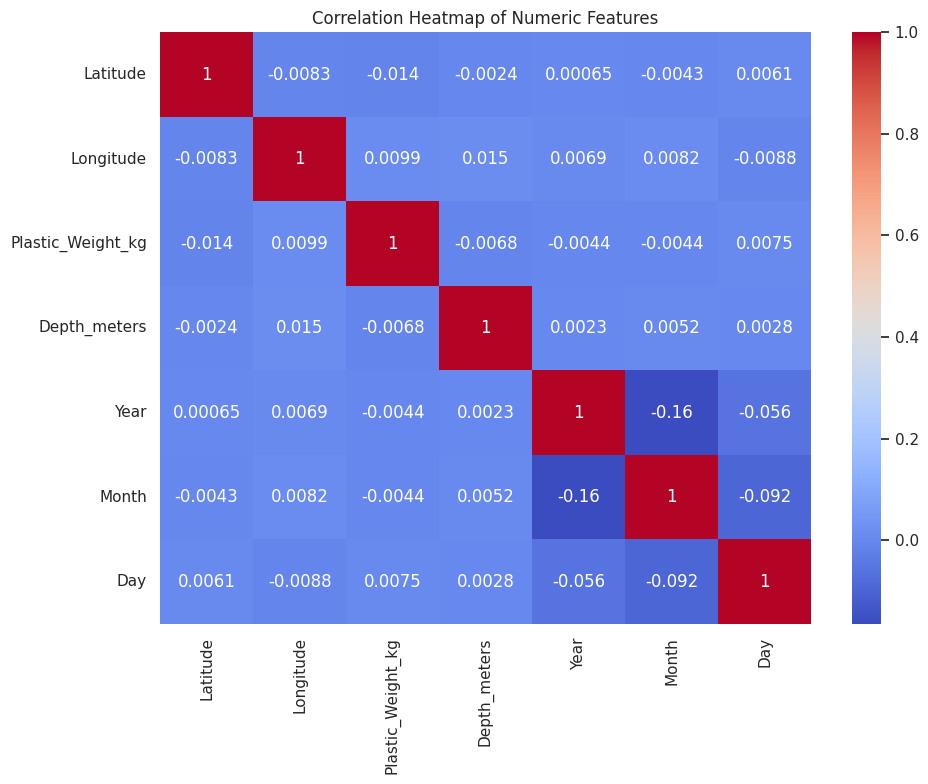

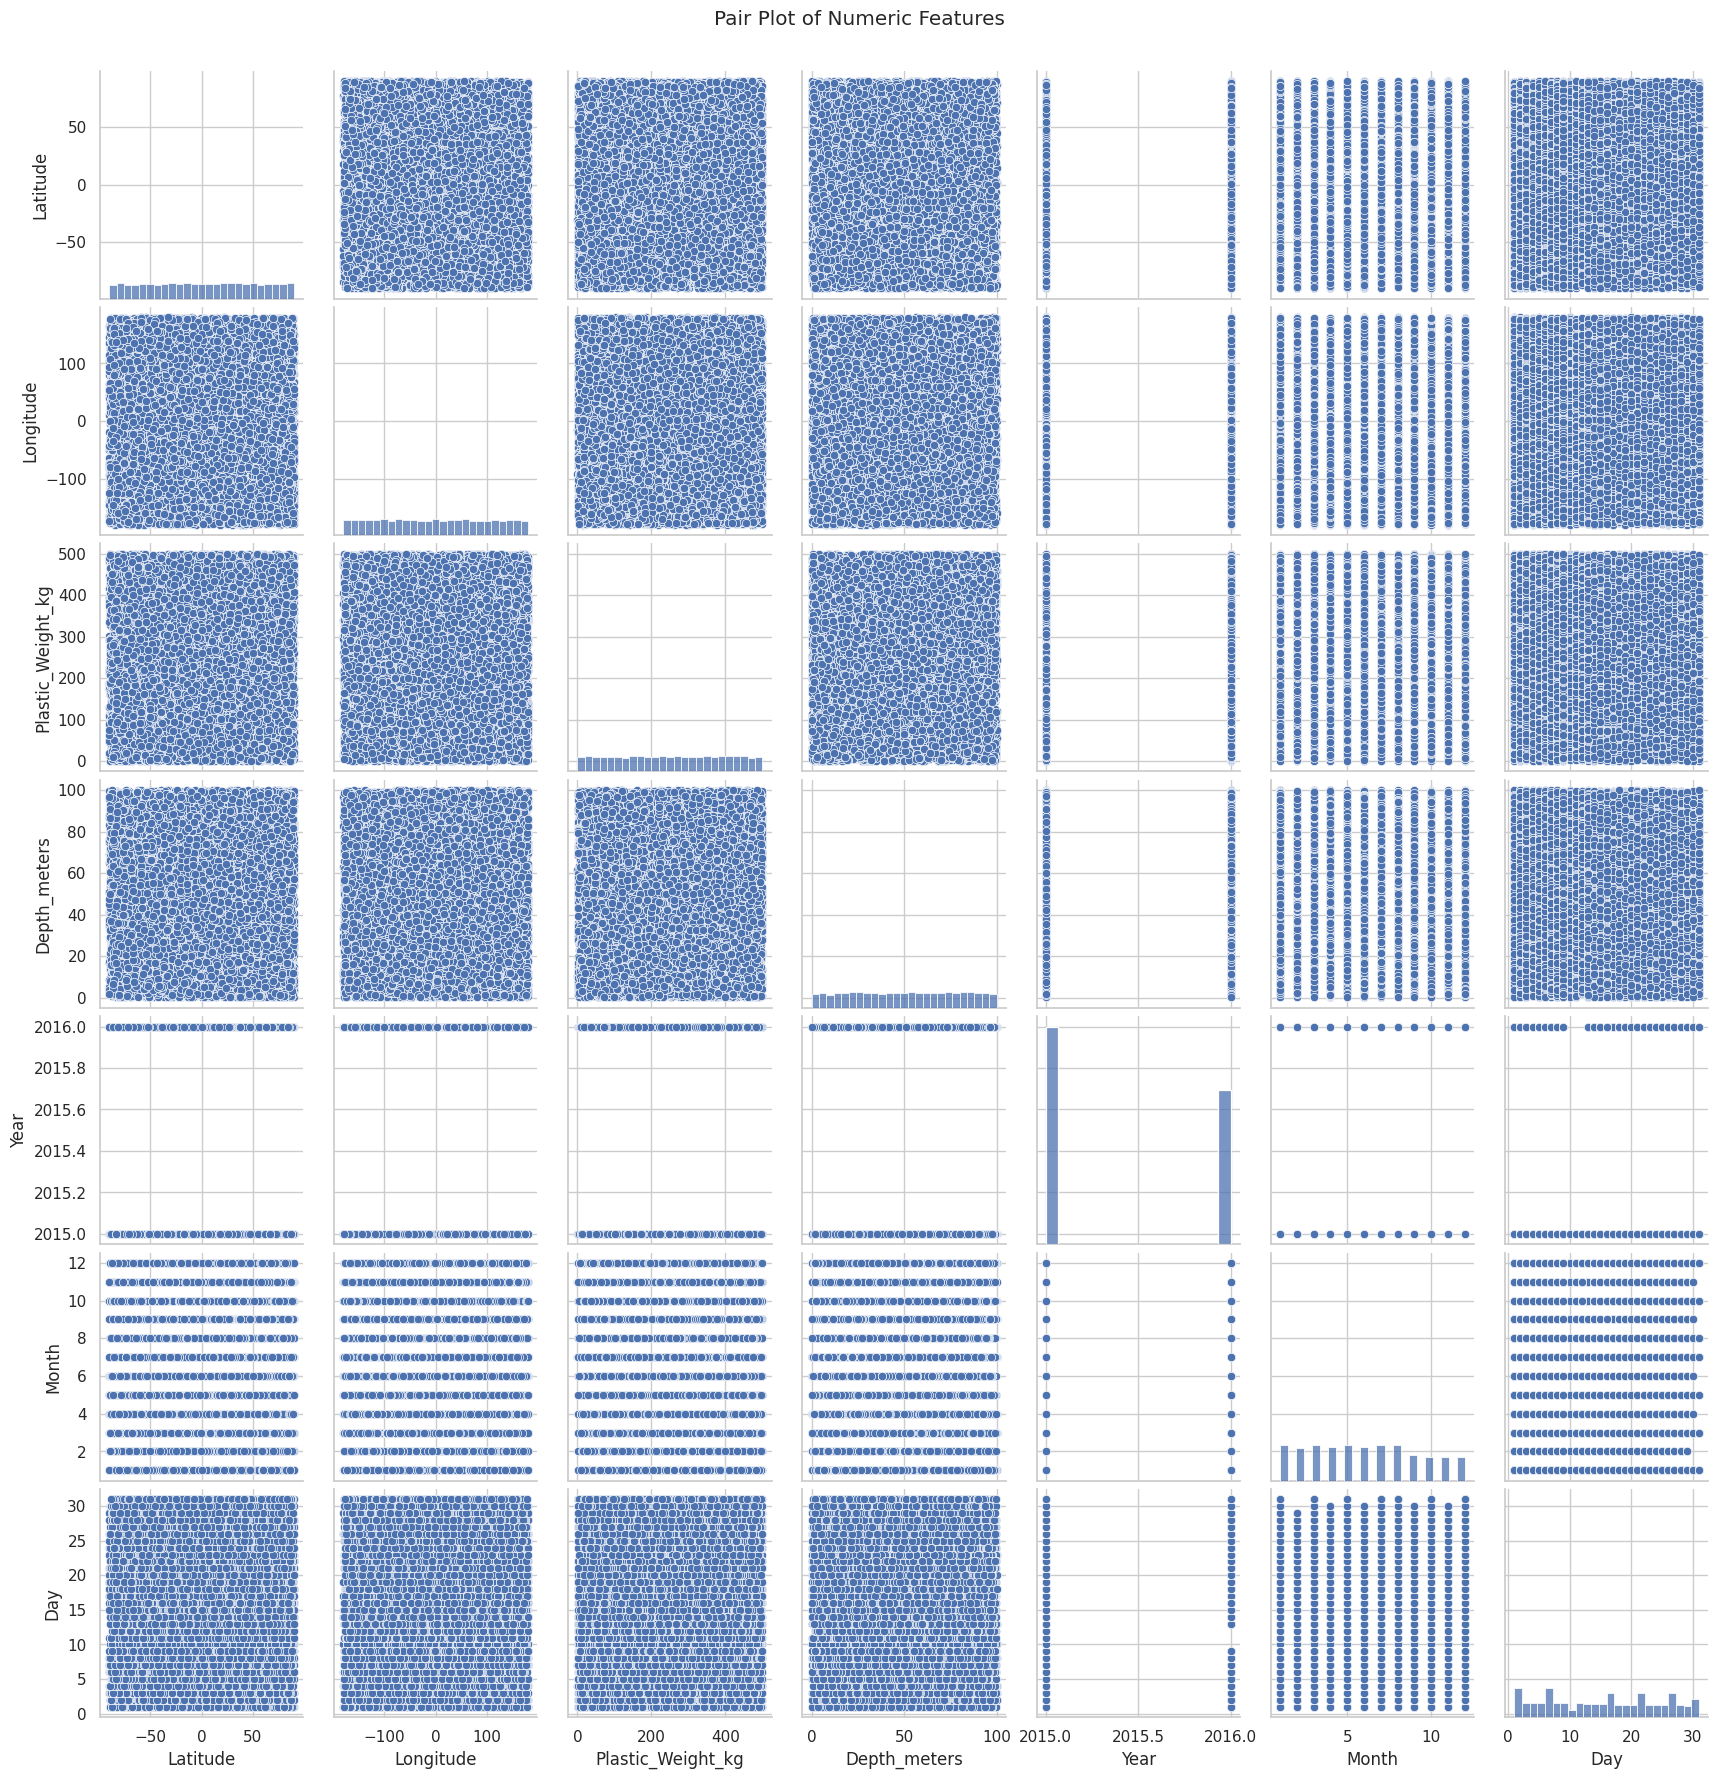

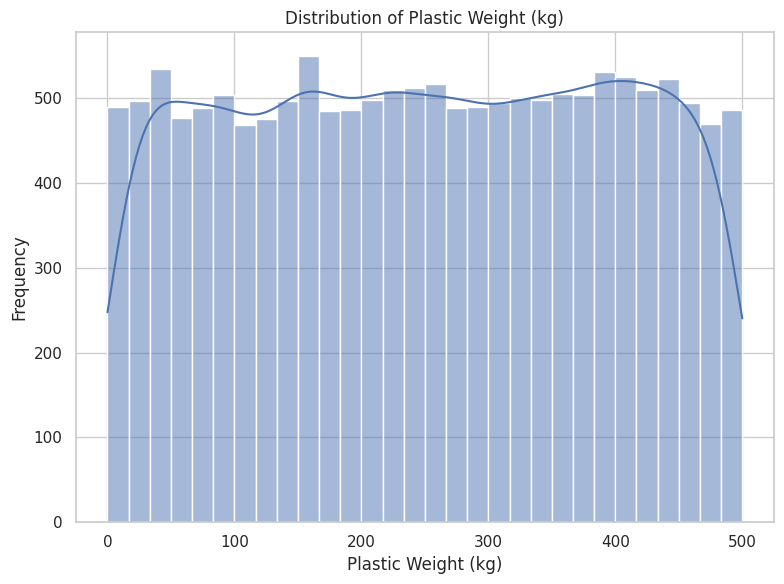

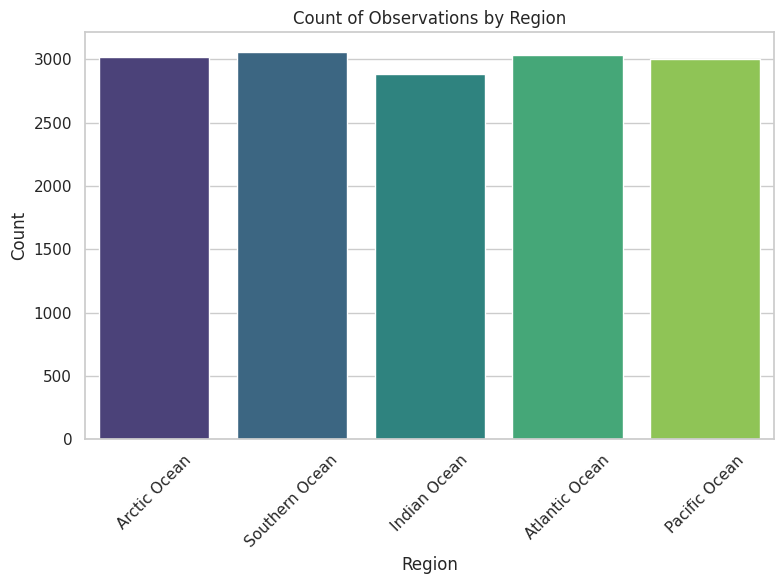

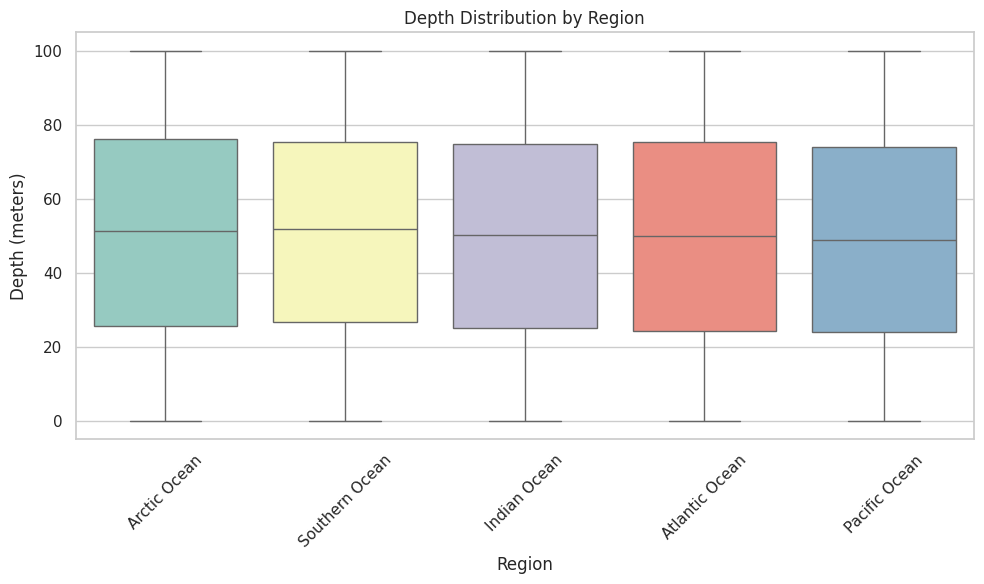

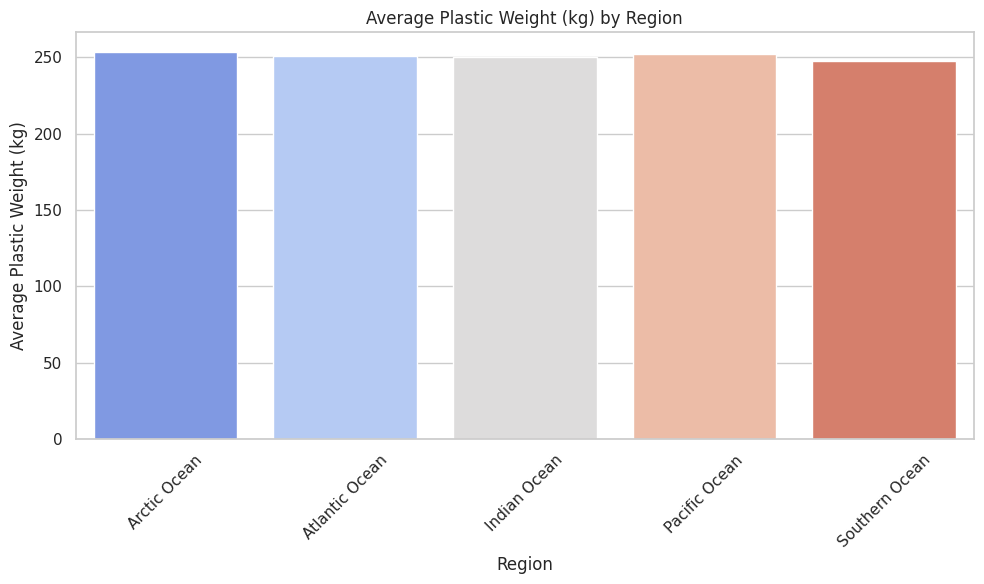

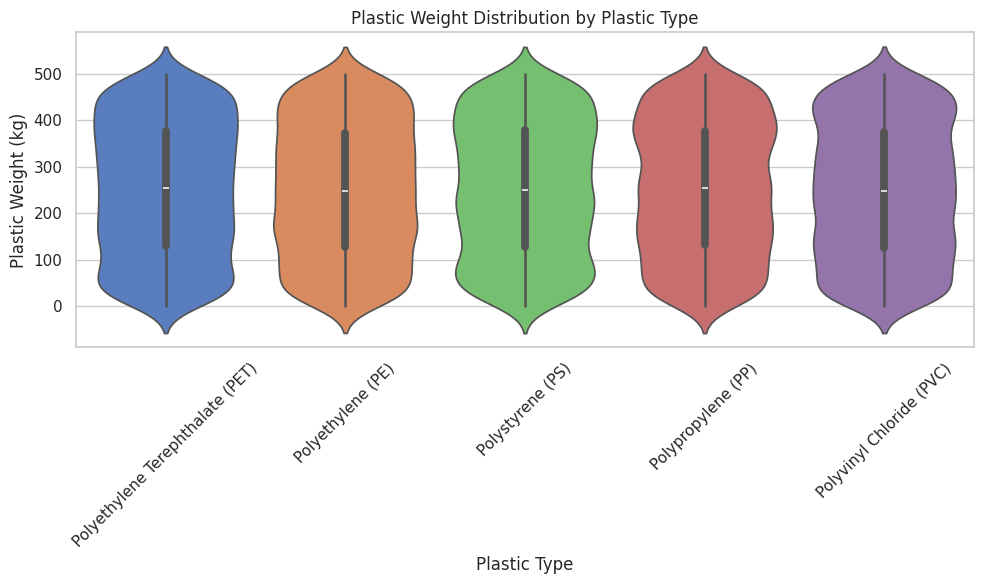

In [ ]:
# Generate a correlation heatmap if there are four or more numeric columns
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap')

# Pair Plot of the numeric features to inspect relationships
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

# Histogram for Plastic_Weight_kg to inspect its distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Plastic_Weight_kg'], kde=True, bins=30)
plt.title('Distribution of Plastic Weight (kg)')
plt.xlabel('Plastic Weight (kg)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Count Plot (Pie Chart alternative) for the Region distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Region', palette='viridis')
plt.title('Count of Observations by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box Plot for Depth_meters by Region to see the data spread
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Depth_meters', palette='Set3')
plt.title('Depth Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Depth (meters)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grouped Barplot: Average Plastic Weight by Region
avg_weight = df.groupby('Region')['Plastic_Weight_kg'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_weight, x='Region', y='Plastic_Weight_kg', palette='coolwarm')
plt.title('Average Plastic Weight (kg) by Region')
plt.xlabel('Region')
plt.ylabel('Average Plastic Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin Plot: Distribution of Plastic Weight across Plastic Types
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Plastic_Type', y='Plastic_Weight_kg', palette='muted')
plt.title('Plastic Weight Distribution by Plastic Type')
plt.xlabel('Plastic Type')
plt.ylabel('Plastic Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


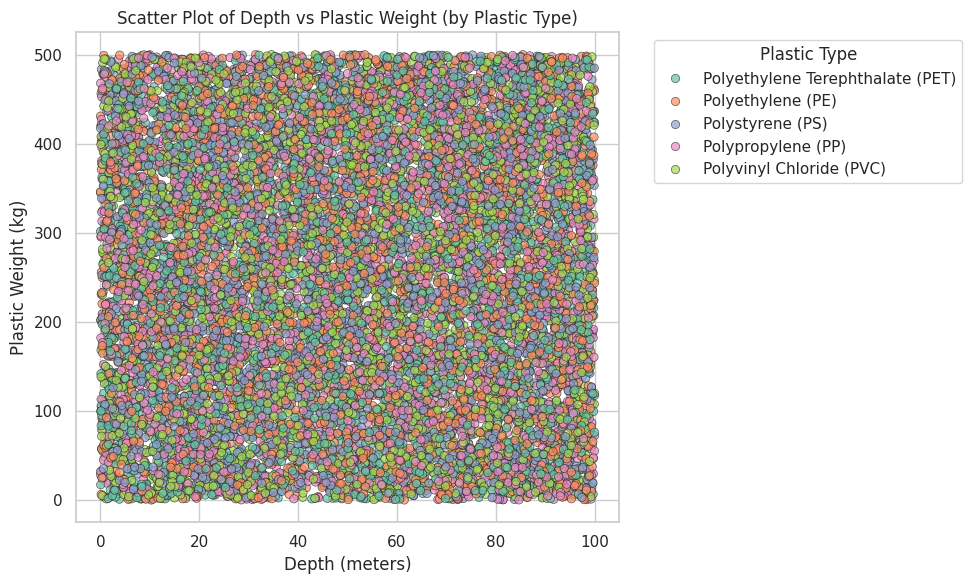

In [ ]:
# Scatter Plot: Depth vs Plastic Weight, colored by Plastic Type
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Depth_meters',
    y='Plastic_Weight_kg',
    hue='Plastic_Type',
    palette='Set2',
    alpha=0.7,
    edgecolor='k'
)
plt.title('Scatter Plot of Depth vs Plastic Weight (by Plastic Type)')
plt.xlabel('Depth (meters)')
plt.ylabel('Plastic Weight (kg)')
plt.legend(title='Plastic Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Predictive Modeling
To understand the potential determinants of plastic pollution, a predictive model is built. To predict the plastic weight based on several features.

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Load and Preprocess Dataset
df = pd.read_csv("ocean_plastic_pollution_data_2015.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# Encode categorical features
df['Region_Code'] = LabelEncoder().fit_transform(df['Region'])
df['Plastic_Type_Code'] = LabelEncoder().fit_transform(df['Plastic_Type'])

# Drop missing values (if any)
df.dropna(inplace=True)

# Select features and target
feature_cols = ['Depth_meters', 'Region_Code', 'Plastic_Type_Code', 'Year']
X = df[feature_cols]
y = df['Plastic_Weight_kg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 3: Model Evaluation Function
model_results = {}

def evaluate_model(model, name):
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        model_results[name] = {'MSE': mse, 'R2': r2}
        print(f'{name} - MSE: {mse:.2f}, R²: {r2:.4f}')
    except Exception as e:
        print(f"{name} failed: {e}")

# Step 4: Train and Evaluate Models
evaluate_model(LinearRegression(), 'Linear Regression')
evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), 'Random Forest')
evaluate_model(SVR(kernel='rbf'), 'SVR')
evaluate_model(XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42), 'XGBoost')

# Optional: Logistic Regression for comparison (will likely fail for regression)
evaluate_model(LogisticRegression(max_iter=1000), 'Logistic Regression')


Linear Regression - MSE: 20737.65, R²: -0.0020
Random Forest - MSE: 24928.13, R²: -0.2045
SVR - MSE: 20696.59, R²: -0.0000
XGBoost - MSE: 21268.95, R²: -0.0277
Logistic Regression failed: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [ ]:
# Step 5: Deep Learning Model (Simple Neural Network)
model_dl = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model_dl.compile(optimizer='adam', loss='mse')
model_dl.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate Deep Learning
y_pred_dl = model_dl.predict(X_test).flatten()
mse_dl = mean_squared_error(y_test, y_pred_dl)
r2_dl = r2_score(y_test, y_pred_dl)
model_results['Deep Learning'] = {'MSE': mse_dl, 'R2': r2_dl}
print(f'Deep Learning - MSE: {mse_dl:.2f}, R²: {r2_dl:.4f}')


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Deep Learning - MSE: 20714.42, R²: -0.0009


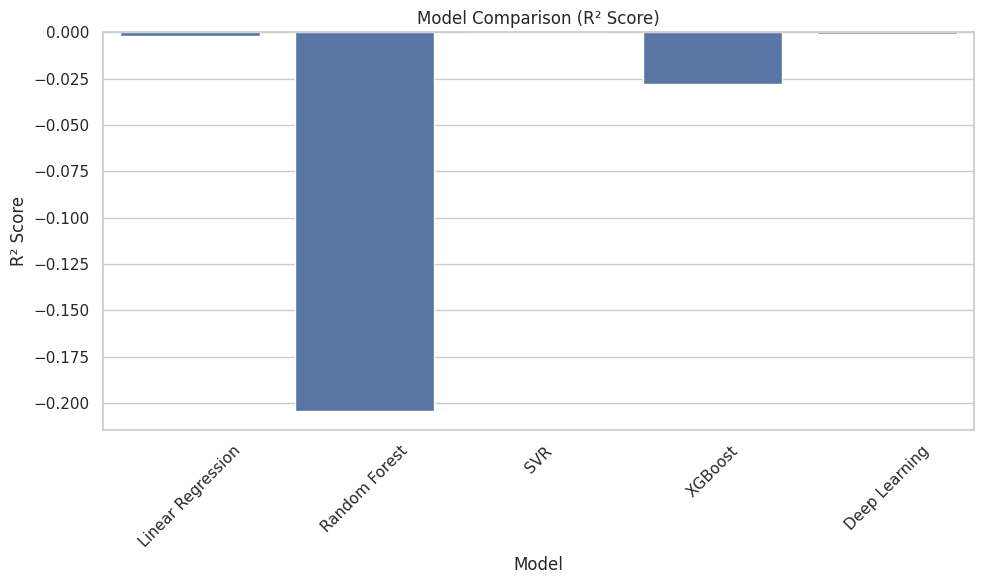

In [ ]:
# Step 6: Compare Model Performance
results_df = pd.DataFrame(model_results).T.reset_index()
results_df.columns = ['Model', 'MSE', 'R2']

# Plot R² comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='R2')
plt.title('Model Comparison (R² Score)')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save Model to Pickle File

choose linear regression


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Load the dataset
df = pd.read_csv("ocean_plastic_pollution_data_2015.csv")

# Convert date and extract year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# Initialize encoders
region_encoder = LabelEncoder()
plastic_type_encoder = LabelEncoder()

# Fit and transform
df['Region_Code'] = region_encoder.fit_transform(df['Region'])
df['Plastic_Type_Code'] = plastic_type_encoder.fit_transform(df['Plastic_Type'])

# Drop rows with missing values
df.dropna(inplace=True)

# Exclude Longitude and Latitude as requested
feature_cols = ['Depth_meters', 'Region_Code', 'Plastic_Type_Code', 'Year']
X = df[feature_cols]
y = df['Plastic_Weight_kg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Optional: Evaluate the model
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.4f}')


MSE: 20737.65
R²: -0.0020


In [ ]:
# Save the model to a .pkl file
with open("plastic_weight_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as plastic_weight_model.pkl")


Model saved as plastic_weight_model.pkl


In [ ]:
# Save both encoders
with open("region_encoder.pkl", "wb") as f:
    pickle.dump(region_encoder, f)

with open("plastic_type_encoder.pkl", "wb") as f:
    pickle.dump(plastic_type_encoder, f)

print("Encoders saved as region_encoder.pkl and plastic_type_encoder.pkl")


Encoders saved as region_encoder.pkl and plastic_type_encoder.pkl
